In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import re, os
from pathlib import Path

files = list(Path('.').glob('data*.csv'))
load_data = []

for i,f in enumerate(files):
    df = pd.read_csv(f.name)
    load_data.append(
        (
            df['Lookup Messages'].mean(), # avg
            df['Lookup Messages'].std(),  # std
            df['Lookup Messages'].sum(),  # total
            1/(1<<(i+3)) * 100            # ideal percent
        )
    )

# make them percentages
load_data = list(map(lambda t: (t[0]/t[2]*100, t[1]/t[2]*100, t[3]), load_data))

print(load_data)

[(12.5, 3.1922805800783745, 12.5), (6.25, 1.9577975247495887, 6.25), (3.125, 1.1967999321933502, 3.125), (1.5625, 0.8436600385980658, 1.5625), (0.78125, 0.46803693172465693, 0.78125), (0.390625, 0.30263447378069286, 0.390625)]


In [34]:
log_files = list(Path('.').glob('log_out_*.log'))
path_data = []

for i,f in enumerate(log_files):
    text = f.read_text()
    paths = re.findall(r"path (\d+) in", text)
    paths = list(map(int, paths))
    path_data.append([1<<(i+3), sum(paths)/len(paths)])

path_df = pd.DataFrame(path_data, columns=['nodes', 'avg path'])

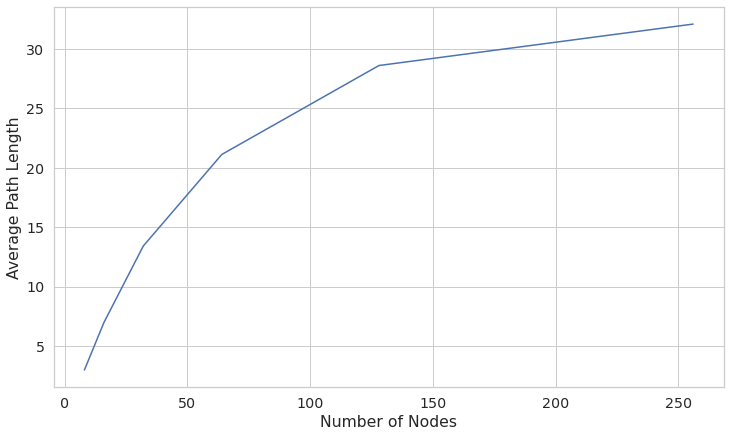

In [52]:
plt.figure(figsize=(12,7))
sns.set(font_scale = 1.3)

sns.set_style("whitegrid")
p = sns.lineplot(x=path_df['nodes'], y=path_df['avg path'])
p.set(xlabel="Number of Nodes", ylabel="Average Path Length")

plt.show()

Text(0, 0.5, 'PDF')

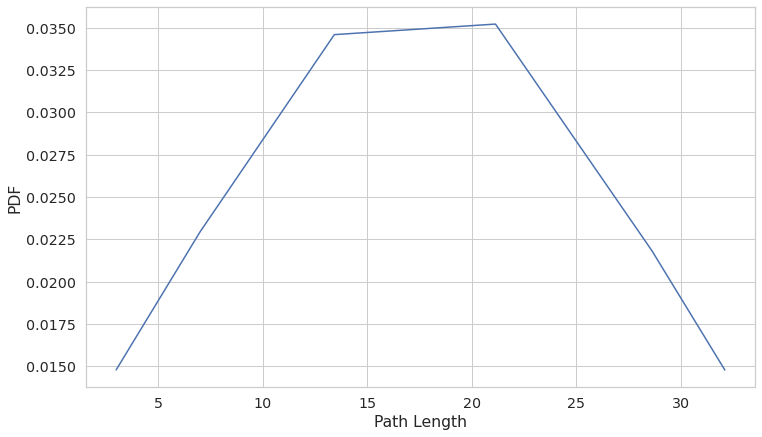

In [53]:
import numpy as np
from scipy import stats

path_df.sort_values(by=["avg path"], inplace=True)
mean = np.mean(path_df["avg path"])
std = np.std(path_df["avg path"])
pdf = stats.norm.pdf(path_df["avg path"], mean, std)

plt.figure(figsize=(12,7))
plt.plot(path_df["avg path"], pdf)

plt.xlabel("Path Length")
plt.ylabel("PDF")
